In [1]:
!pip install tensorflow
!pip install keras

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
!curl -O kagglelimages_5340.zip
!unzip -q kagglelimages_5340.zip
!ls

curl: Remote file name has no length!
curl: (23) Failed writing received data to disk/application
replace readme[1].txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace CDLA-Permissive-2.0.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2017_bentley_continental_24_gt3_special_edition_4k-3840x2160.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2017_bentley_flying_spur_w12_s_5k-3840x2160.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2017_bmw_i8_frozen_black_4k-3840x2160.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2017_mercedes_amg_gt3-2560x1440.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2017_mercedes_benz_concept_a_sedan-2560x1440.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2018_bentley_continental_gt_hd-2560x1440.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/Oboi/2018_bmw_m4_convertible-2560x1440.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace Images/O

In [17]:
!ls Images

Oboi  Wood


In [21]:
import os

num_skipped = 0
for folder_name in ("Oboi", "Wood"):
    folder_path = os.path.join("Images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 76 images


In [22]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "Images",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 301 files belonging to 2 classes.
Using 241 files for training.
Using 60 files for validation.


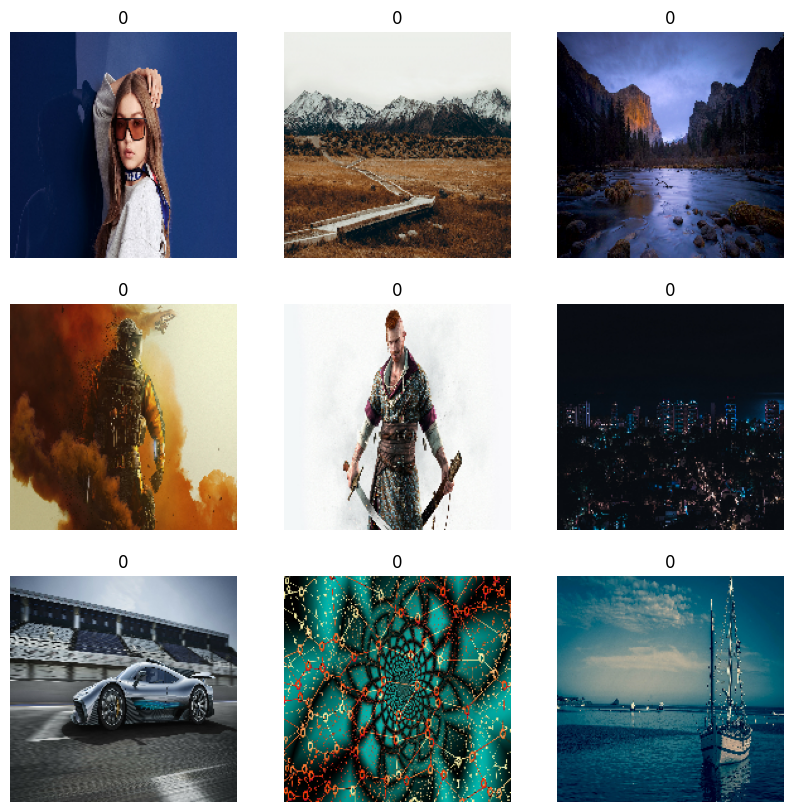

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

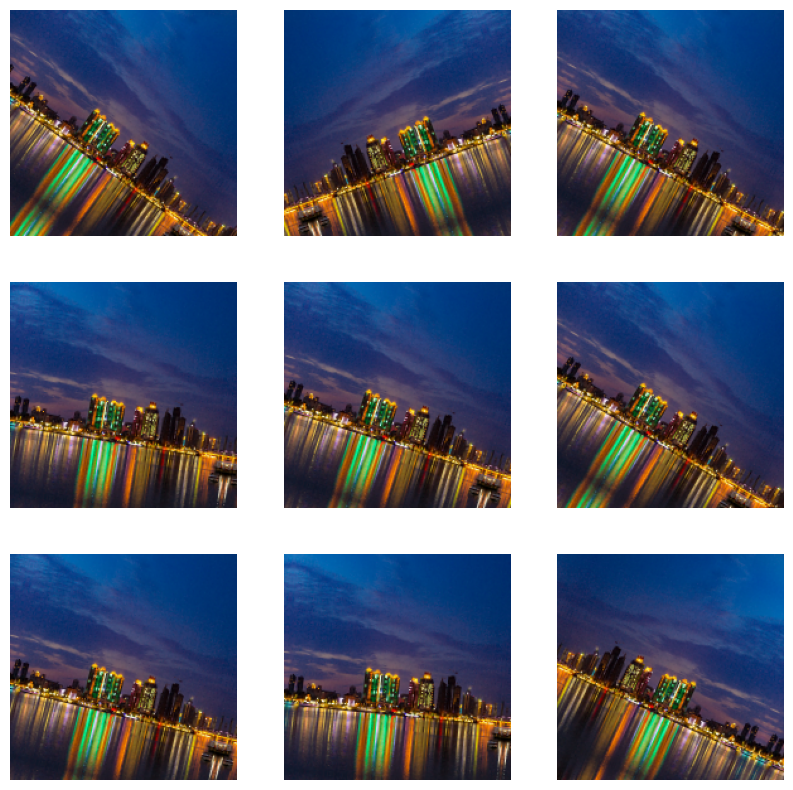

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

35363/35363 [==============================] - 0s 0us/step
Predictions:
1: crossword_puzzle (0.31)
2: menu (0.05)
3: oboe (0.05)


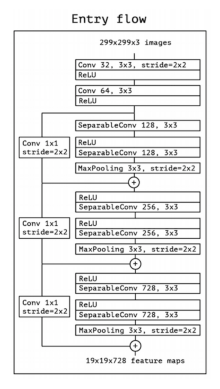

In [32]:
# Импорт необходимых библиотек
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка предварительно обученной модели Xception
model = Xception(weights='imagenet')

# Загрузка изображения для классификации
img_path = 'entry-flow.png'
img = image.load_img(img_path, target_size=(299, 299))  # Размер входного изображения для Xception

# Преобразование изображения в массив numpy
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Получение предсказаний от модели
predictions = model.predict(img_array)

# Декодирование и вывод топ-3 предсказаний
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Вывод изображения
img = image.load_img(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [57]:
!pip install tensorflow keras numpy

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [60]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [61]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [62]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 58s 80ms/step - loss: 1.6542 - accuracy: 0.4039 - val_loss: 1.3642 - val_accuracy: 0.5218
Epoch 2/10
704/704 [==============================] - 54s 76ms/step - loss: 1.3506 - accuracy: 0.5214 - val_loss: 1.2010 - val_accuracy: 0.5846
Epoch 3/10
704/704 [==============================] - 56s 80ms/step - loss: 1.2364 - accuracy: 0.5624 - val_loss: 1.1025 - val_accuracy: 0.6252
Epoch 4/10
704/704 [==============================] - 58s 82ms/step - loss: 1.1561 - accuracy: 0.5962 - val_loss: 1.0536 - val_accuracy: 0.6356
Epoch 5/10
704/704 [==============================] - 55s 78ms/step - loss: 1.1059 - accuracy: 0.6128 - val_loss: 1.0076 - val_accuracy: 0.6530
Epoch 6/10
704/704 [==============================] - 60s 85ms/step - loss: 1.0639 - accuracy: 0.6293 - val_loss: 0.9472 - val_accuracy: 0.6804
Epoch 7/10
704/704 [==============================] - 58s 82ms/step - loss: 1.0299 - accuracy: 0.6411 - val_loss: 0.9500 - val_accuracy:

In [64]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 4s - loss: 0.9257 - accuracy: 0.6805 - 4s/epoch - 13ms/step
Test loss: 0.9256894588470459
Test accuracy: 0.6804999709129333


1/1 [==============================] - 1s 1s/step
This image is 100.00% oboi and 0.00% wood.


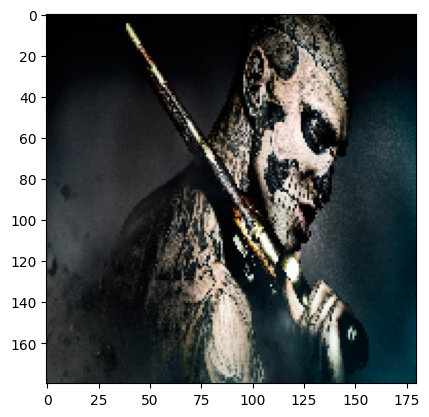

In [56]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the Xception model
model = Xception(weights='imagenet')

# Load and preprocess the image
img = keras.utils.load_img(
    "Images/Oboi/47_ronin_freak-2560x1440.jpg", target_size=image_size
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Resize the image
resized_img_array = tf.image.resize(img_array, (299, 299))

# Predict the image class
predictions = model.predict(resized_img_array)
score = predictions[0][0]  # Access the scalar prediction value

print(f"This image is {100 * (1 - score):.2f}% oboi and {100 * score:.2f}% wood.")